In [14]:
import numpy as np
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [6]:
# 导入数据集
iris = datasets.load_iris()
# 交叉验证划分数据集
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
# 普通划分数据集
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=0)


In [32]:
# 距离度量 -> 这个只能是算两点之间的距离，要考虑矩阵情况下如何计算
def compute_distance(x1, x2):
    return np.sqrt(np.sum(np.square(x1 - x2)))

def compute_distance_matrix(matrix1, matrix2):
    # 计算矩阵的行数
    m = matrix1.shape[0]
    n = matrix2.shape[0]
    # 初始化一个矩阵
    distance_matrix = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            distance_matrix[i, j] = compute_distance(matrix1[i], matrix2[j])
    return distance_matrix

def compute_distance_m(matrix1,matrix2):
    m = matrix1.shape[0]
    n = matrix2.shape[0]
    distance_matrix = np.zeros((m,n))
    # 距离的展开式 
    M = np.dot(matrix1, matrix2.T)
    print(M.shape)
    # 矩阵一的平方和
    m1 = np.square(matrix1).sum(axis=1)
    print(np.matrix(m1).shape)
    print(m1.reshape(-1,1).shape)
    # 矩阵二的平方和
    m2 = np.square(matrix2).sum(axis=1)
    print(m2.shape)
    # 计算所有的距离
    dists = np.sqrt(-2 * M +np.matrix(m1).T+ m2)
    return dists


(120, 30)


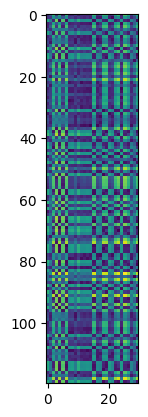

In [42]:
dist = compute_distance_matrix(X_train, X_test)
print(dist.shape)
plt.imshow(dist, interpolation='none')
plt.show()

In [45]:
from collections import Counter
# 标签预测函数
def predict_label(distance, y_train, k):
    num_test = distance.shape[1]
    y_pred = np.zeros(num_test)
    for i in range(num_test):
        closet_y = []
        labels = y_train[np.argsort(distance[:, i])].flatten() # np.argsort()返回的是数组值从小到大的索引值
        closet_y = labels[:k]
        y_pred[i] = Counter(closet_y).most_common(1)[0][0] # Counter.most_common(n)返回前n个出现次数最多的元素和出现次数
    return y_pred
predict_label(dist, y_train, 5)

array([2., 1., 0., 2., 0., 2., 0., 1., 1., 1., 2., 1., 1., 1., 2., 0., 1.,
       1., 0., 0., 2., 1., 0., 0., 2., 0., 0., 1., 1., 0.])

In [46]:
y_test_pred = predict_label(dist, y_train, 5)
print(y_test_pred)
print('The accuracy is: ', np.mean(y_test_pred == y_test))

[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 2. 0. 1. 1. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 1. 1. 0.]
The accuracy is:  0.9666666666666667
